<a href="https://colab.research.google.com/github/VaishaliMishra8/HeartDisease_Dataset/blob/main/Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from xgboost import XGBClassifier

In [ ]:
url = 'https://raw.githubusercontent.com/VaishaliMishra8/asdfgj/main/heart_data.csv'
heart = pd.read_csv(url)
display(heart)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
 print(heart.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler
 # Split features and target
 X = heart.drop("cardio", axis=1)
 y = heart["cardio"]
 # Train-test split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 # Feature Scaling
 scaler = StandardScaler()
 X_train = scaler.fit_transform(X_train)
 X_test = scaler.transform(X_test)

###Train Xgboost

In [ ]:
# Train XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

###Evaluate the model

In [ ]:
# Predictions
y_pred = xgb_model.predict(X_test)

# Accuracy and metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7331428571428571
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



### Confusion Matrix

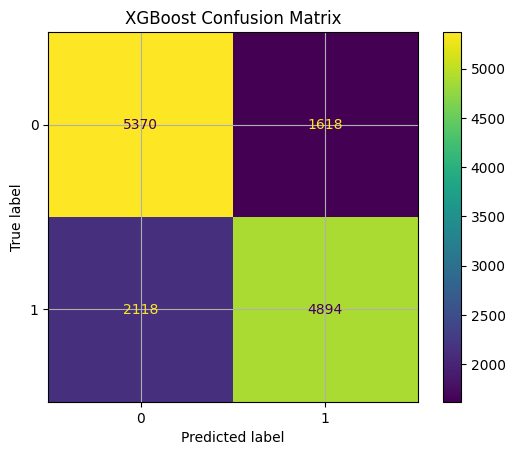

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("XGBoost Confusion Matrix")
plt.grid()
plt.show()


###ROC Curve

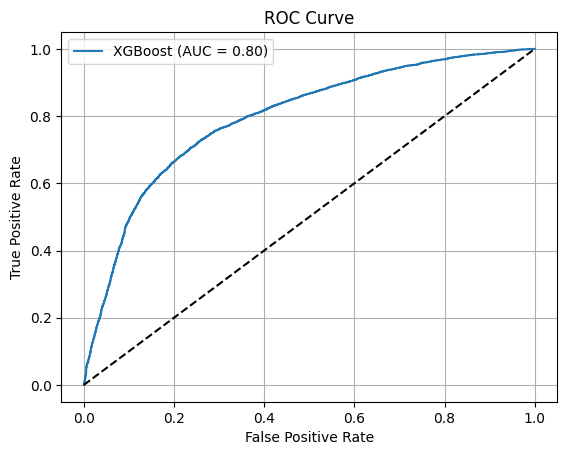

In [ ]:
from sklearn.metrics import roc_curve, auc
# Probabilities for ROC
y_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC Curve Plot
plt.plot(fpr, tpr, label="XGBoost (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

###Train and validate accuracy

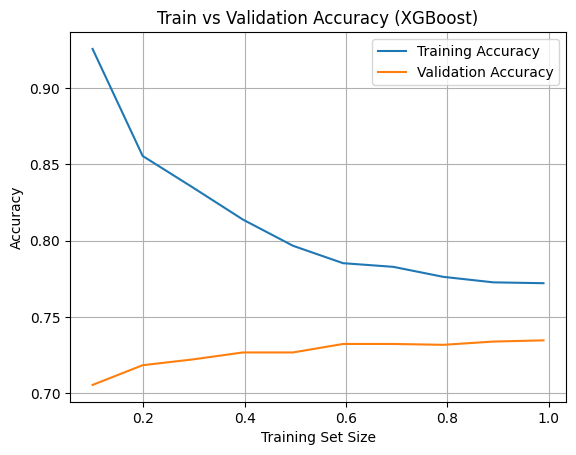

🔍 Best Validation Accuracy: 0.7346 at Training Size: 0.99
📌 Final Training Accuracy: 0.7721
📌 Final Validation Accuracy: 0.7346

Training Size | Train Acc | Val Acc
0.10         | 0.9257    | 0.7054
0.20         | 0.8555    | 0.7184
0.30         | 0.8349    | 0.7221
0.40         | 0.8138    | 0.7267
0.50         | 0.7967    | 0.7267
0.59         | 0.7852    | 0.7323
0.69         | 0.7829    | 0.7323
0.79         | 0.7763    | 0.7317
0.89         | 0.7727    | 0.7339
0.99         | 0.7721    | 0.7346


In [ ]:
# Avoid using 1.0 to prevent empty validation set
train_sizes = np.linspace(0.1, 0.99, 10)
train_scores = []
test_scores = []

# Simulate learning curve for XGBoost
for frac in train_sizes:
    X_part, _, y_part, _ = train_test_split(X_train, y_train, train_size=frac, random_state=42)
    model = XGBClassifier(eval_metric='logloss', random_state=0)
    model.fit(X_part, y_part)
    train_scores.append(model.score(X_part, y_part))
    test_scores.append(model.score(X_test, y_test))

# Plot accuracy curves
plt.plot(train_sizes, train_scores, label='Training Accuracy')
plt.plot(train_sizes, test_scores, label='Validation Accuracy')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy (XGBoost)")
plt.legend()
plt.grid()
plt.show()

# Find the best validation accuracy and corresponding training size
best_index = np.argmax(test_scores)
best_train_size = train_sizes[best_index]
best_val_score = test_scores[best_index]

# Final scores
final_train_acc = train_scores[-1]
final_val_acc = test_scores[-1]

print(f"🔍 Best Validation Accuracy: {best_val_score:.4f} at Training Size: {best_train_size:.2f}")
print(f"📌 Final Training Accuracy: {final_train_acc:.4f}")
print(f"📌 Final Validation Accuracy: {final_val_acc:.4f}\n")

# Detailed per-point accuracy
print("Training Size | Train Acc | Val Acc")
for i in range(len(train_sizes)):
    print(f"{train_sizes[i]:.2f}         | {train_scores[i]:.4f}    | {test_scores[i]:.4f}")
